In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

#### Function to classify point using line formula

In [3]:
def classifyPoint(point: np.ndarray):
    line = 3 * point[0] + 2
    return np.sign(point[1] - line)

#### Function to train perceptron for classifying points

In [13]:
def trainPerceptron(points: np.ndarray, labels: np.ndarray, lrn_rate=0.01, epochs=100):
    weights = np.random.rand(2)
    bias = np.random.rand(1)
    for _ in range(epochs):
        for point, label in zip(points, labels):
            # Single neuron "forward pass"
            prediction = np.sign(np.dot(weights, point) + bias)
            # Single neuron "backward pass"
            error = label - prediction
            weights += lrn_rate * error * point
            bias += lrn_rate * error
    return weights, bias

#### Function to classify point using trained perceptron

In [14]:
def predictPerceptron(point, weights, bias):
    return np.sign(np.dot(weights, point) + bias)[0]

#### Randomly fenerated training and testing sets

In [ ]:
train_points = np.random.uniform(-10, 10, (100, 2))
train_labels = np.array([classifyPoint(point) for point in train_points])
test_points = np.random.uniform(-10, 10, (100, 2))
test_labels = np.array([classifyPoint(point) for point in test_points])

#### Train the perceptron

In [7]:
weights, bias = trainPerceptron(train_points, train_labels)
print(weights, bias)

[-0.59363359  0.23846392] [-0.19837129]


#### Use the trained perceptron to classify testing and training set

In [ ]:
train_predictions = np.array([predictPerceptron(point, weights, bias) for point in test_labels])
test_predictions = np.array([predictPerceptron(point, weights, bias) for point in test_points])

#### Function to plot the prediction accuracy

In [ ]:
def plotResult(points: np.ndarray, labels: np.ndarray, predictions: np.ndarray):
    _, axes = plt.subplots(1, 2, figsize=(12, 6))
    line_space = np.linspace(-10, 10)
    line = 3 * line_space + 2
    titles = ["True Labels", "Predictions"]
    for ax, data, title in zip(axes, [labels, predictions], titles):
        ax.plot(line_space, line, 'k-', label="y = 3x + 2")
        for point, label in zip(points, data):
            color = ["red", "green", "blue"][int(label) + 1]
            ax.scatter(point[0], point[1], color=color, marker='o')
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.set_title(title)
        ax.legend()
        ax.grid()
    plt.tight_layout()
    plt.show()

#### Prediction accuracy for training set

Train Accuracy: 1.0


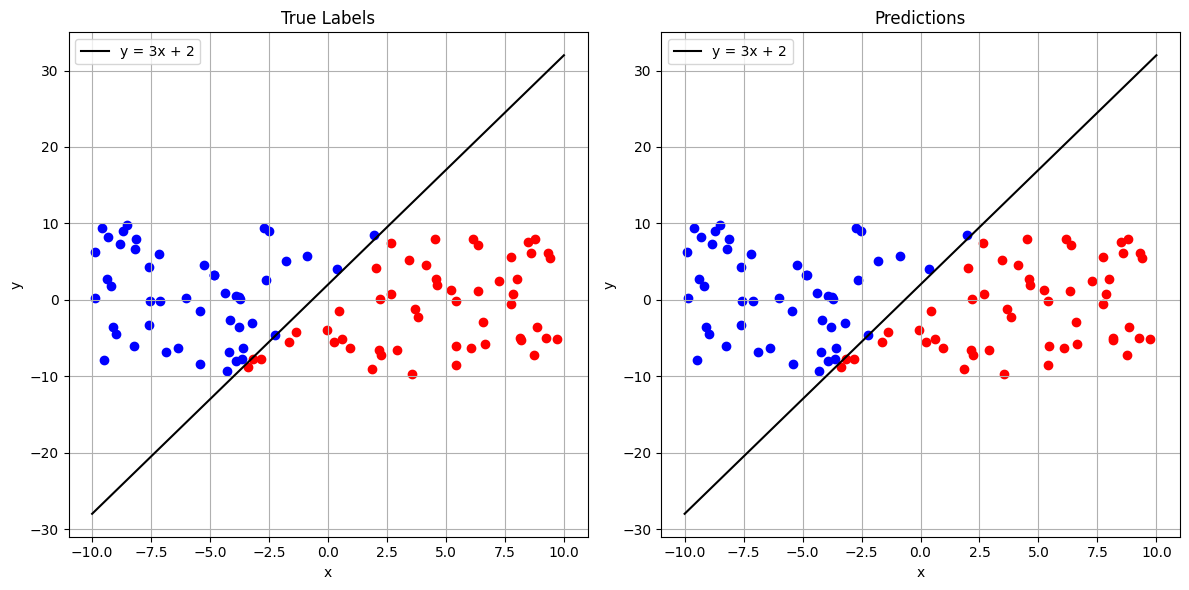

In [11]:
print(f"Train Accuracy: {np.mean(train_labels == train_predictions)}")
plotResult(train_points, train_labels, train_predictions)

#### Prediction accuracy for testing set

Test Accuracy: 0.98


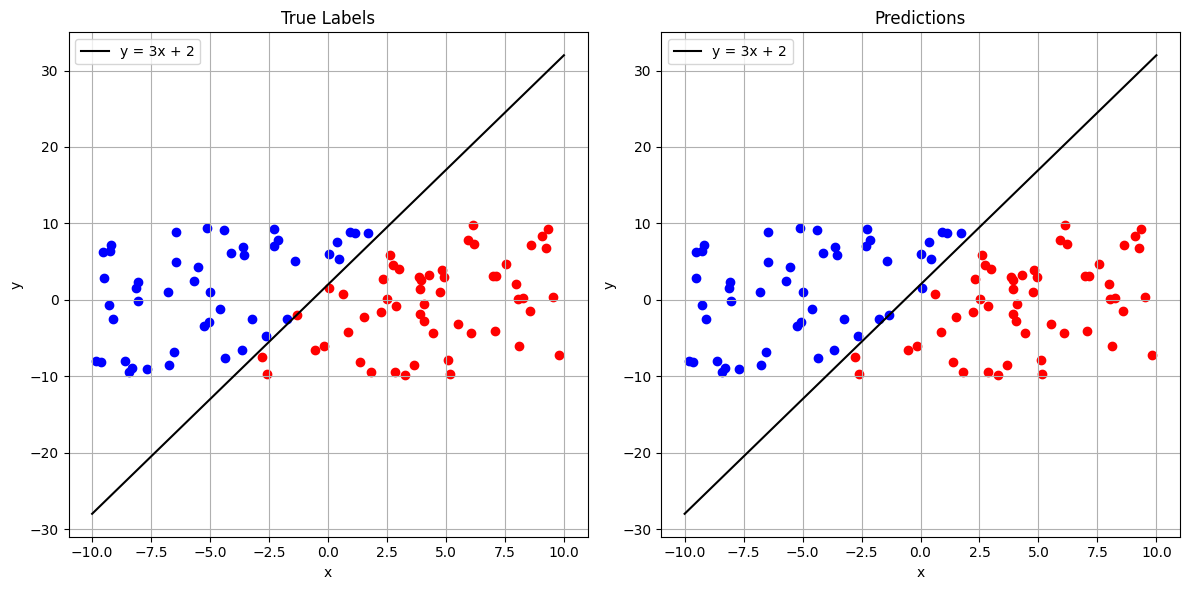

In [12]:
print(f"Test Accuracy: {np.mean(test_labels == test_predictions)}")
plotResult(test_points, test_labels, test_predictions)